In [4]:
import json
from decord import VideoReader
from tqdm.auto import tqdm
from pathlib import Path
from PIL import Image

all_anns = {
    split: json.load(open(f'../data/vq_v2_{split}_anno.json'))
    for split in ['train', 'val']
}

In [2]:
all_anns['val'][0]

{'video_uid': 'e14e03f8-13e4-4df2-87b0-e1ad8a175f7c',
 'clip_uid': 'd5935c29-1b8d-417d-9bbb-5ebd47e9256d',
 'annotation_uid': '3760b439-d94b-4d76-8b39-1bb355800649',
 'query_set': '3',
 'clip_fps': 5.0,
 'clip_duration': 480.0,
 'original_width': 1920,
 'original_height': 1080,
 'query_frame': 1433,
 'object_title': 'sellotape',
 'visual_crop': {'fno': 0, 'x': 725.29, 'y': 611.46, 'w': 176.83, 'h': 185.12},
 'response_track_valid_range': [1292, 1350],
 'response_track': [{'fno': 1292,
   'x': 1.1,
   'y': 1007.51,
   'w': 116.43,
   'h': 70.69},
  {'fno': 1293, 'x': -0.23, 'y': 926.14, 'w': 126.4, 'h': 153.53},
  {'fno': 1294, 'x': -1.38, 'y': 881.55, 'w': 82.32, 'h': 197.79},
  {'fno': 1295, 'x': -0.23, 'y': 811.81, 'w': 81.18, 'h': 267.54},
  {'fno': 1296, 'x': 2.05, 'y': 784.37, 'w': 85.75, 'h': 292.69},
  {'fno': 1297, 'x': 2.05, 'y': 784.37, 'w': 85.75, 'h': 292.69},
  {'fno': 1298, 'x': 2.05, 'y': 784.37, 'w': 94.37, 'h': 295.25},
  {'fno': 1299, 'x': 2.05, 'y': 784.37, 'w': 89.8

  0%|          | 0/13607 [00:00<?, ?it/s]

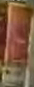

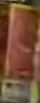

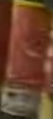

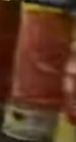

In [8]:
p_clips_dir = Path('/data/datasets/ego4d_data/v2/clips')
for split in ['train', 'val']:
    p_crop_out_dir = Path('../outputs/ego4d_data/v2/vq2d_crops/gts') / split
    p_crop_out_dir.mkdir(parents=True, exist_ok=True)
    for ann in tqdm(all_anns[split]):
        clip_uid = ann['clip_uid']
        p_clip_crop_out_dir = p_crop_out_dir / clip_uid
        p_clip_crop_out_dir.mkdir(parents=True, exist_ok=True)
        vr = VideoReader(str(p_clips_dir / f'{clip_uid}.mp4'))
        qset_uuid = f"{ann['annotation_uid']}_{ann['query_set']}"
        s, e = ann['response_track_valid_range']
        rt = ann['response_track']
        frames = vr.get_batch(list(range(6*s, 6*e+1, 6))).asnumpy()
        assert len(frames) == len(rt), f"{len(frames)=} != {len(rt)=}"
        for i, (frame, bbox) in enumerate(zip(frames, rt)):
            frame = Image.fromarray(frames[i])
            x1, y1, x2, y2 = bbox['x'], bbox['y'], bbox['x']+bbox['w'], bbox['y']+bbox['h']
            crop = frame.crop((x1, y1, x2, y2))
            fno = bbox['fno']
            p_frame = p_clip_crop_out_dir / f'{qset_uuid}_{fno}.png'
            crop.save(p_frame)
            display(crop)
        break
    break